In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv
/kaggle/input/game-winner/Data/pubg.csv


# Basic Imports

In [2]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [3]:
df = pd.read_csv("../input/game-winner/Data/pubg.csv")

# Reading Columns

In [4]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# Getting dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# Checking Null Value

In [7]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

# Checking Index number of that Null Value

In [8]:
df.loc[pd.isna(df["winPlacePerc"]),:].index[0]

2744604

# Replace Null Value with Mean Value

In [9]:
df["winPlacePerc"]=df["winPlacePerc"].fillna(df["winPlacePerc"].mean())

# Rechecking Null Value

In [10]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Checking Duplicates Value

In [11]:
df.duplicated().sum()

0

# Checking Number of Unique Value in each Feature

In [12]:
for i in df.columns:
    print(f"df[{i}] : {df[i].nunique()}")

df[Id] : 4446966
df[groupId] : 2026745
df[matchId] : 47965
df[assists] : 20
df[boosts] : 27
df[damageDealt] : 29916
df[DBNOs] : 39
df[headshotKills] : 34
df[heals] : 63
df[killPlace] : 101
df[killPoints] : 1707
df[kills] : 58
df[killStreaks] : 18
df[longestKill] : 28284
df[matchDuration] : 1267
df[matchType] : 16
df[maxPlace] : 100
df[numGroups] : 100
df[rankPoints] : 2262
df[revives] : 25
df[rideDistance] : 33562
df[roadKills] : 14
df[swimDistance] : 28345
df[teamKills] : 11
df[vehicleDestroys] : 6
df[walkDistance] : 38599
df[weaponsAcquired] : 97
df[winPoints] : 1447
df[winPlacePerc] : 3001


# Numerical Data

In [13]:
num_data = df.select_dtypes(exclude="object")
num_data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# Statistical Analysis of Numerical type data

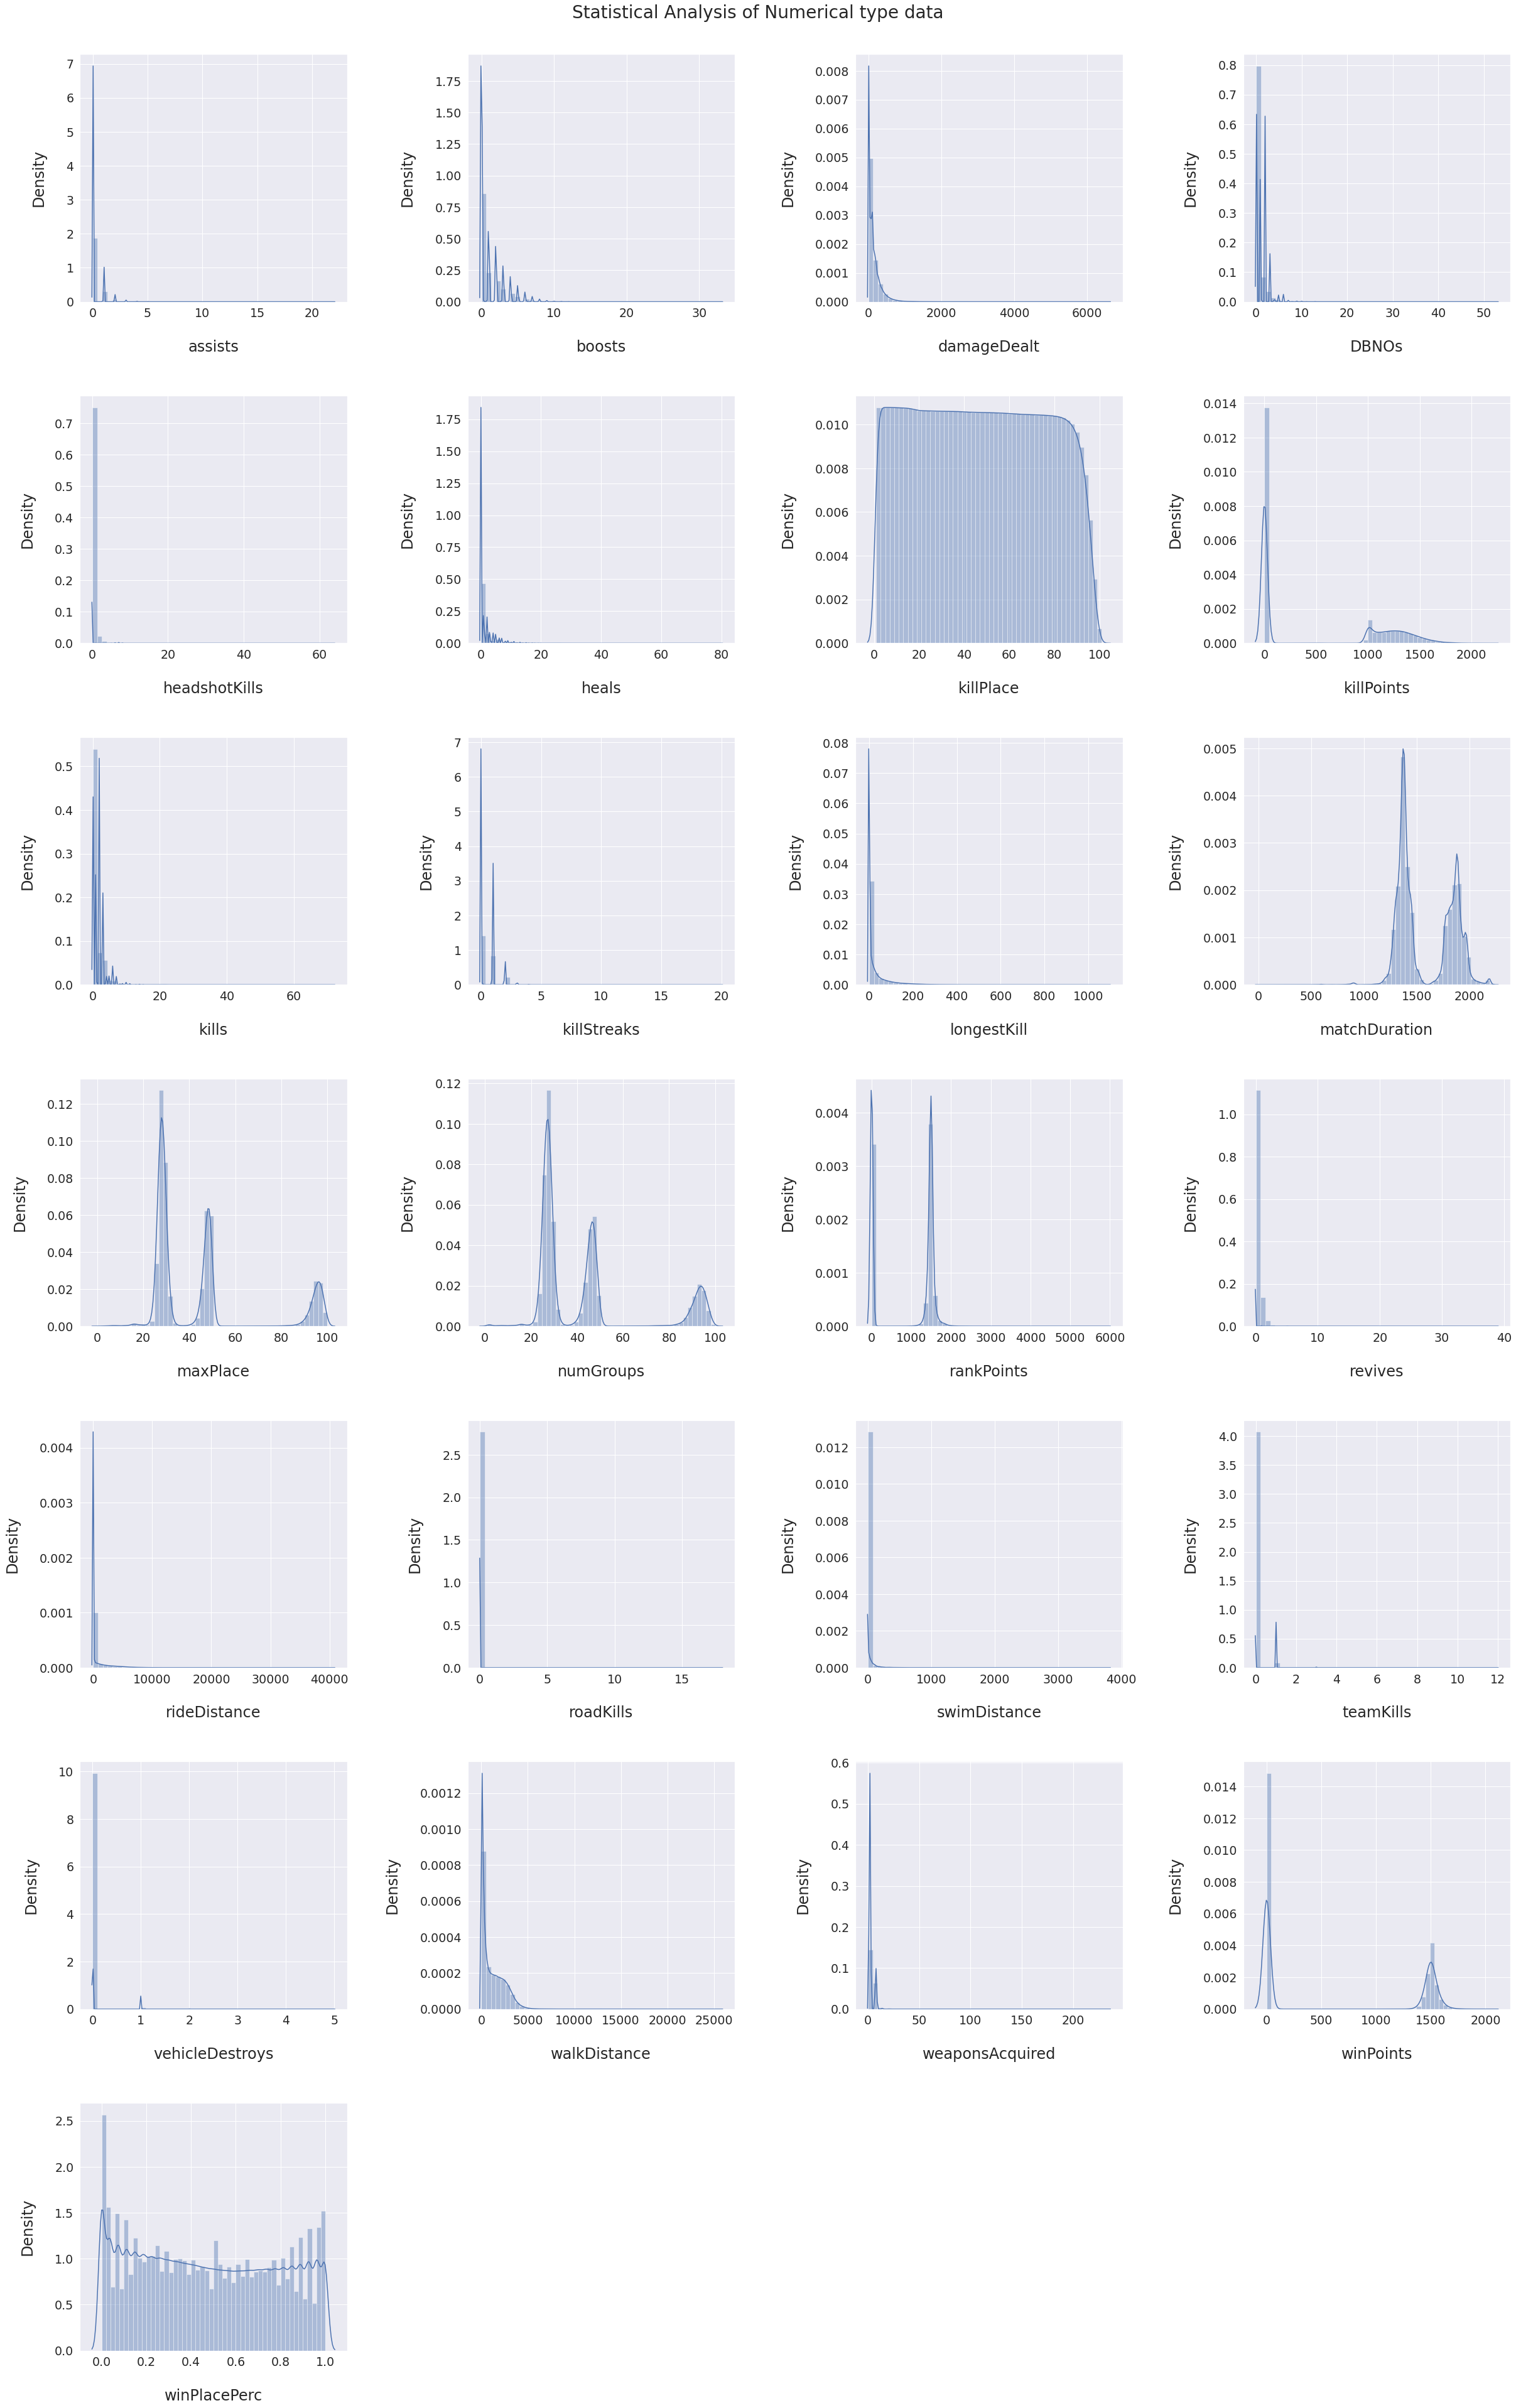

In [14]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":19,"ytick.labelsize":19,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,55))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=28)
for index,col in enumerate(num_data):
    plt.subplot(7,4,index+1)
    sns.distplot(num_data.loc[:,col])
    plt.xlabel(f"\n{col}",fontsize=24)
    plt.ylabel("Density\n",fontsize=24)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.96)

# Checking Skewness 

In [15]:
from scipy.stats import skew
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

skew_columns = skewedness(num_data)
for i in skew_columns:
    print(f"\033[1mSkewed Column name : {i}")

Skewed Column name : assists
Skewed Column name : damageDealt
Skewed Column name : DBNOs
Skewed Column name : headshotKills
Skewed Column name : heals
Skewed Column name : kills
Skewed Column name : longestKill
Skewed Column name : revives
Skewed Column name : rideDistance
Skewed Column name : roadKills
Skewed Column name : swimDistance
Skewed Column name : teamKills
Skewed Column name : vehicleDestroys
Skewed Column name : weaponsAcquired


# Skewed Column Data

In [16]:
num_data[skew_columns]

,assists,damageDealt,DBNOs,headshotKills,heals,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired
0,0,0.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,0,1
1,0,91.47,0,0,0,0,0.00,0,0.0045,0,11.040,0,0,5
2,1,68.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,0,2
3,0,32.90,0,0,0,0,0.00,0,0.0000,0,0.000,0,0,3
4,0,100.00,0,0,0,1,58.53,0,0.0000,0,0.000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0.00,0,0,0,0,0.00,0,1292.0000,0,0.000,0,0,3
4446962,0,44.15,0,0,0,0,0.00,0,0.0000,0,0.000,0,0,6
4446963,0,59.06,0,0,0,0,0.00,0,0.0000,0,2.184,0,0,4
4446964,0,180.40,1,1,2,2,98.50,2,0.0000,0,0.000,0,0,8


# Skewed Columns Analysis

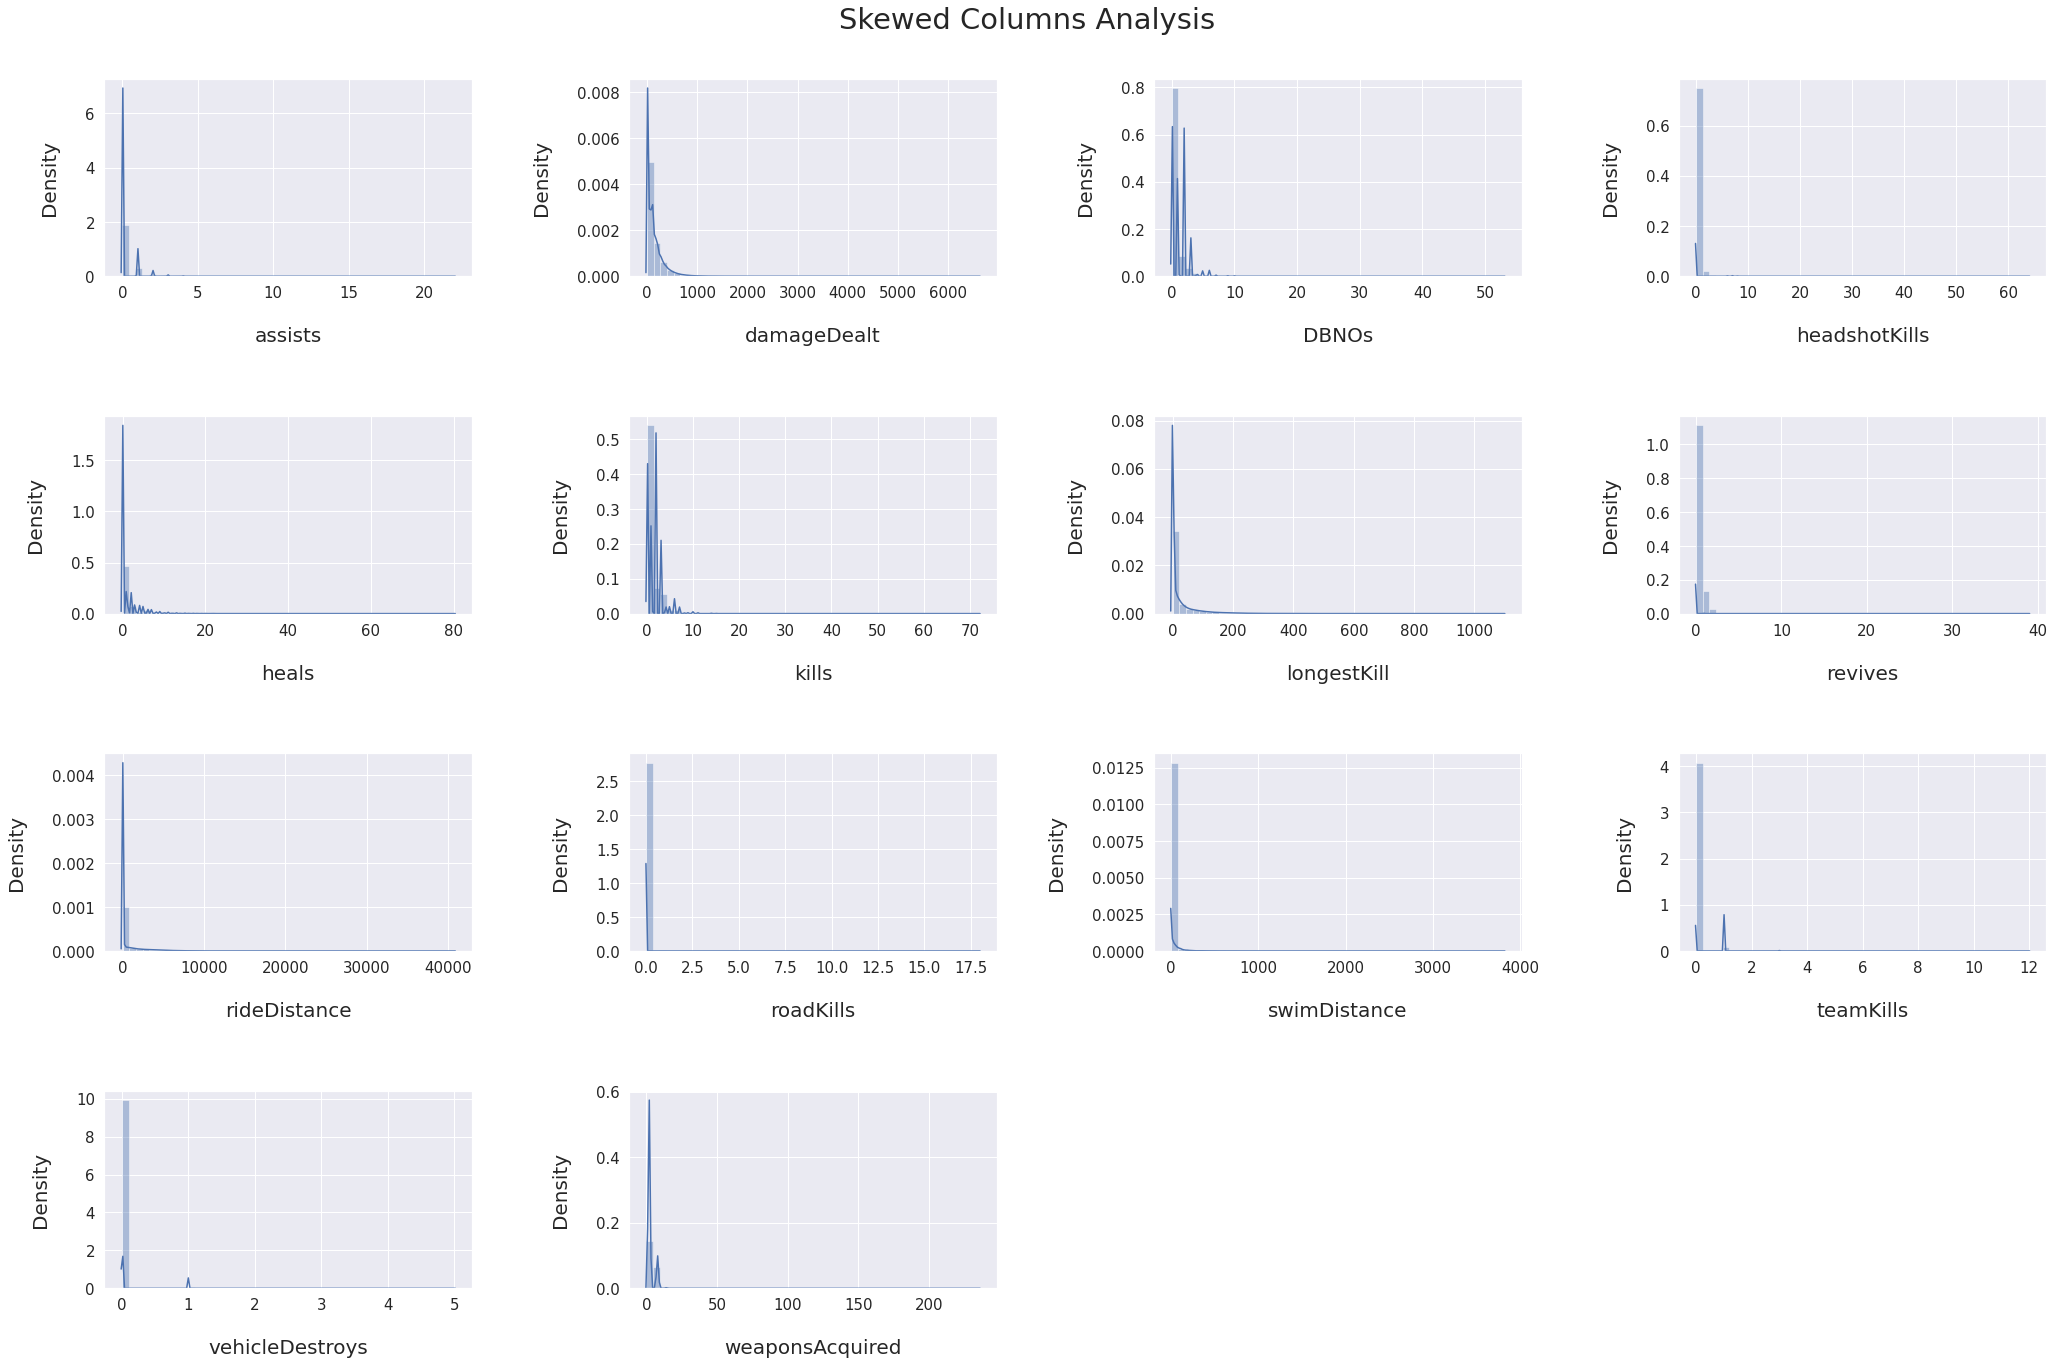

In [17]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
fig = plt.figure(figsize=(30,20))
fig.suptitle("Skewed Columns Analysis", fontsize=29)
for index,col in enumerate(num_data[skew_columns]):
    plt.subplot(4,4,index+1)
    sns.distplot(num_data.loc[:,col])
    plt.xlabel(f"\n{col}",fontsize=20)
    plt.ylabel("Density\n",fontsize=20)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

# Applying QuantileTransformer to the skewed column 

In [18]:
# applying QuantileTransformer to the skewed column
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
num_data[skew_columns] = quantile.fit_transform(num_data[skew_columns])

In [19]:
num_data[skew_columns].skew()

assists             1.727139
damageDealt        -0.801796
DBNOs               0.548576
headshotKills       1.787963
heals               0.432736
kills               0.323589
longestKill         0.334293
revives             2.190586
rideDistance        1.148176
roadKills          18.420231
swimDistance        3.545677
teamKills           6.561028
vehicleDestroys    11.351501
weaponsAcquired    -1.859763
dtype: float64

# Rechecking Skewed Columns

In [20]:
skewedness(num_data)

['revives', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys']

# After Operation on Skewed Columns Analysis

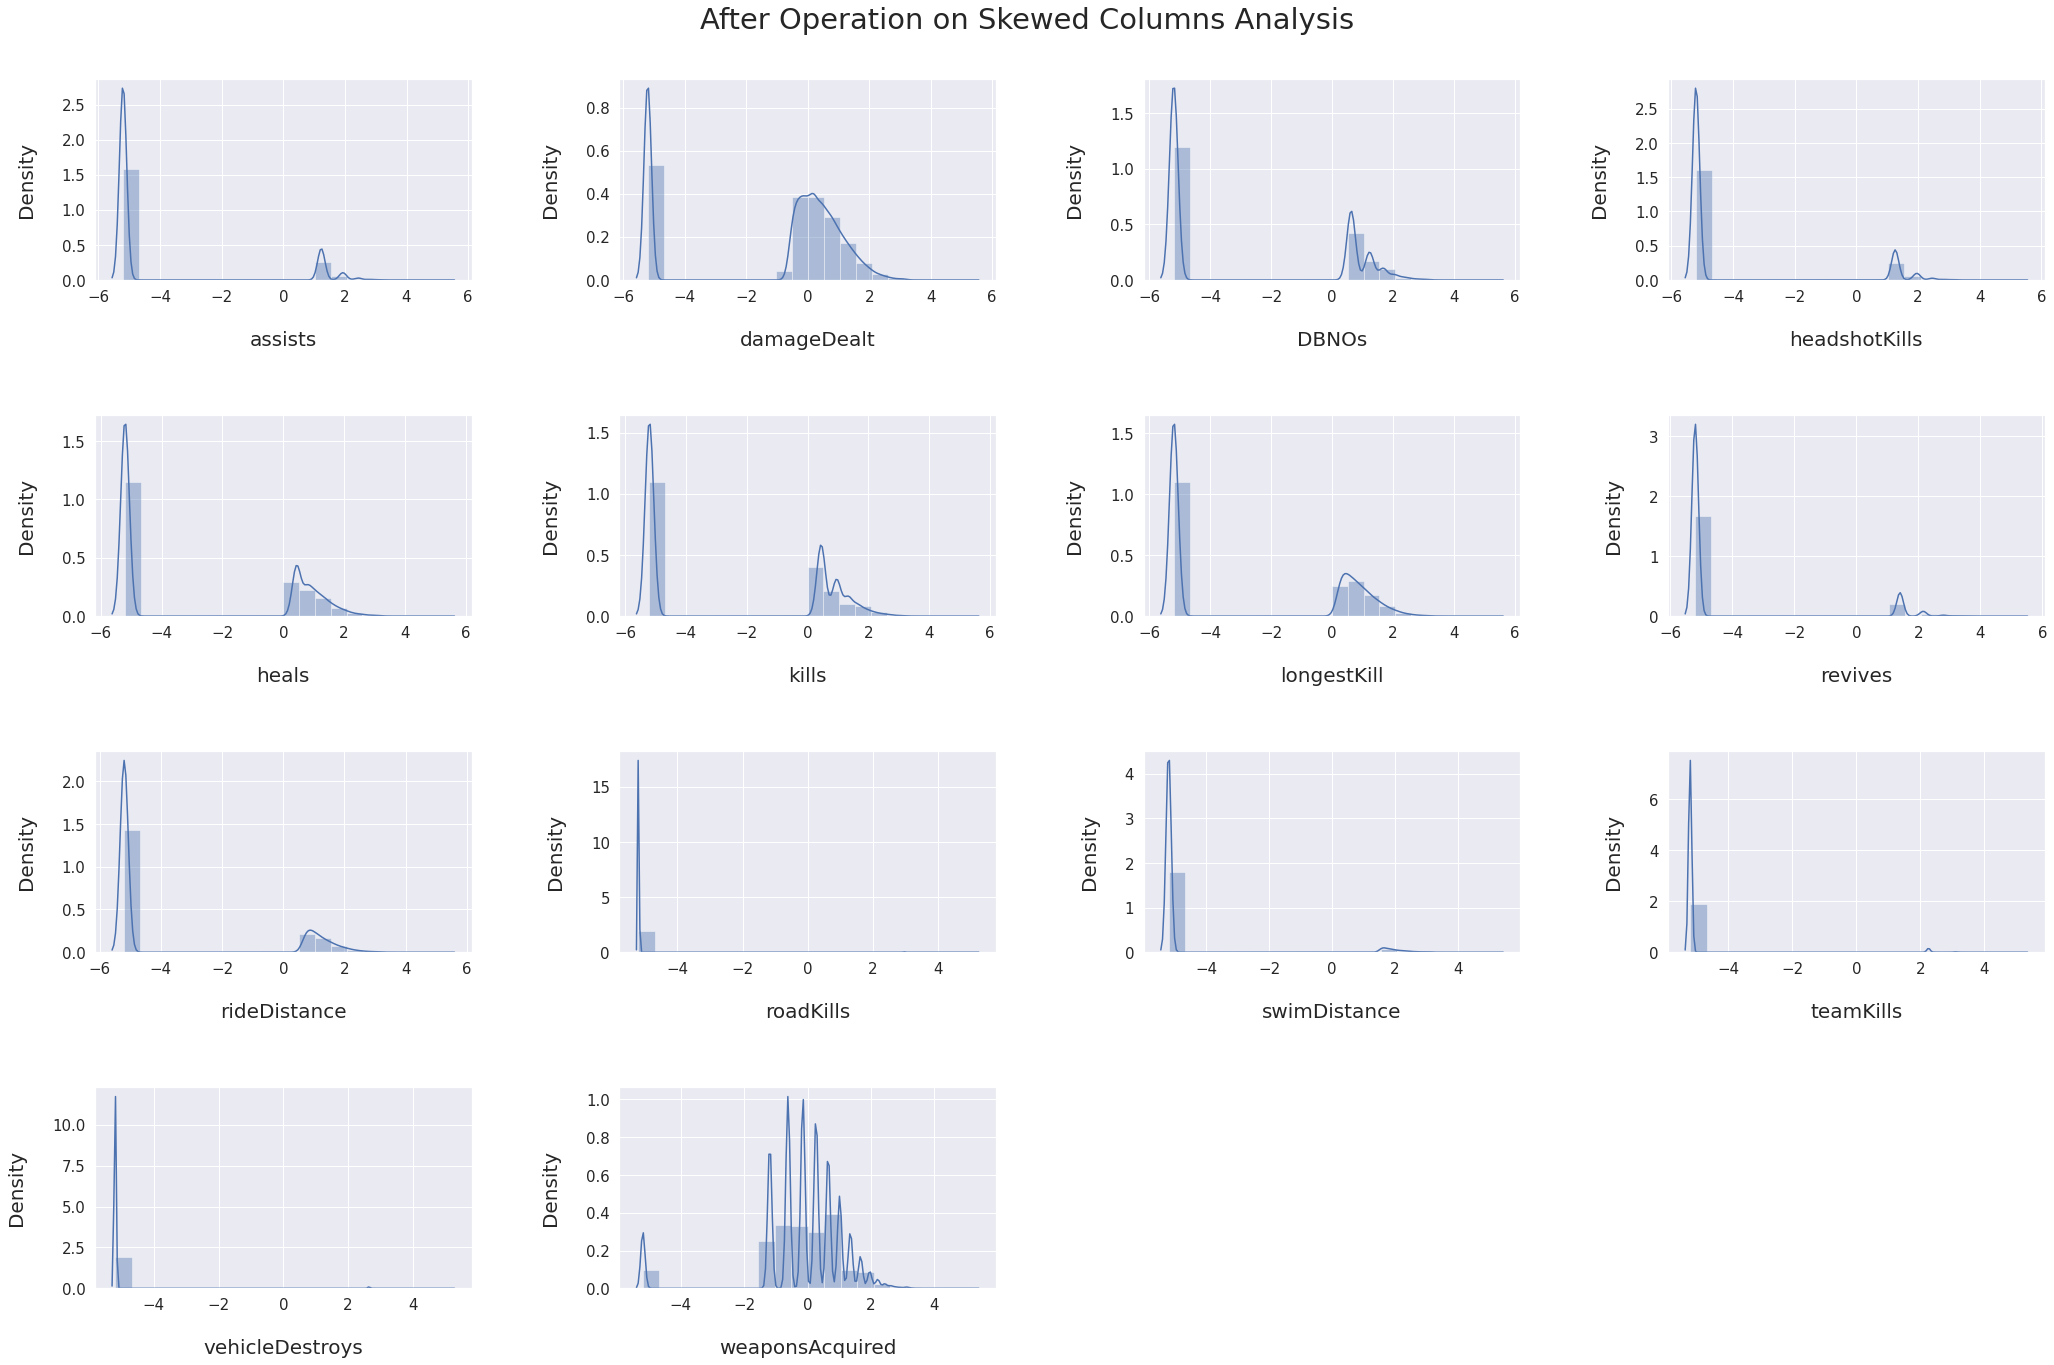

In [21]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
fig = plt.figure(figsize=(30,20))
fig.suptitle("After Operation on Skewed Columns Analysis", fontsize=29)
for index,col in enumerate(num_data[skew_columns]):
    plt.subplot(4,4,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=20)
    plt.ylabel("Density\n",fontsize=20)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

# Object Data

In [22]:
# storing object type data in obj_data variable
obj_data = df.select_dtypes(include="object")
obj_data = obj_data[["matchType"]]
obj_data

,matchType
0,squad-fpp
1,squad-fpp
2,duo
3,squad-fpp
4,solo-fpp
...,...
4446961,squad-fpp
4446962,solo
4446963,squad-fpp
4446964,squad-fpp


# Creating DataFrame

In [23]:
final_df = pd.concat([obj_data,num_data], axis=1)
final_df

,matchType,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,squad-fpp,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,60,1241,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,244.80,-1.194628,1466,0.4444
1,squad-fpp,-5.199338,0,0.048093,-5.199338,-5.199338,-5.199338,57,0,-5.199338,...,-5.199338,0.656264,-5.199338,1.641205,-5.199338,-5.199338,1434.00,0.648724,0,0.6400
2,duo,1.233962,0,-0.117532,-5.199338,-5.199338,-5.199338,47,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,161.80,-0.619578,0,0.7755
3,squad-fpp,-5.199338,0,-0.373263,-5.199338,-5.199338,-5.199338,75,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,202.70,-0.148584,0,0.1667
4,solo-fpp,-5.199338,0,0.179102,-5.199338,-5.199338,-5.199338,45,0,0.443149,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,49.75,-0.619578,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,squad-fpp,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,74,1029,-5.199338,...,-5.199338,1.016532,-5.199338,-5.199338,-5.199338,-5.199338,1019.00,-0.148584,1507,0.1786
4446962,solo,-5.199338,1,-0.293748,-5.199338,-5.199338,-5.199338,69,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,81.70,1.010382,0,0.2935
4446963,squad-fpp,-5.199338,0,-0.179771,-5.199338,-5.199338,-5.199338,66,0,-5.199338,...,-5.199338,-5.199338,-5.199338,1.539450,-5.199338,-5.199338,788.70,0.265284,0,0.4815
4446964,squad-fpp,-5.199338,4,0.649964,0.630254,1.258508,0.774833,11,0,0.951518,...,2.156675,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,2748.00,1.669112,0,0.8000


# Checking Outlier

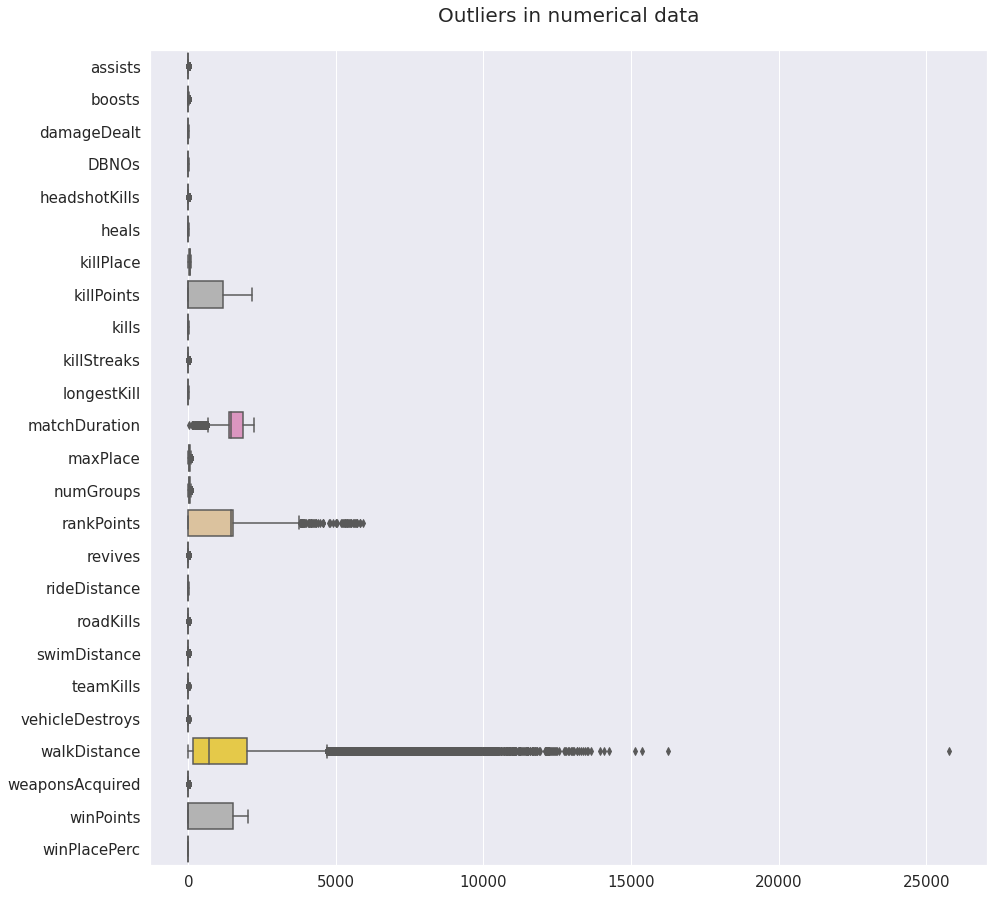

In [24]:
plt.figure(figsize=(15,15))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outliers in numerical data\n",fontsize=20)
plt.show()

# Operation on Column which strongly correlation with target variable

In [25]:
print(f"\033[1m 10% quantile of assists : {num_data['assists'].quantile(0.10)}")
print(f"\033[1m 90% quantile of assists : {num_data['assists'].quantile(0.90)}")

 10% quantile of assists : -5.199337582605575
 90% quantile of assists : 1.23396159022193


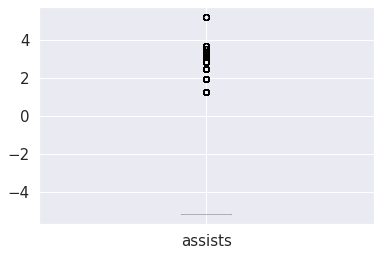

In [26]:
plt.show(num_data.boxplot('assists'))

In [27]:
num_data['assists'] = np.where(num_data['assists'] >1.23396159022193, 1.23396159022193,num_data['assists'])
t=skew(num_data['assists'])
print("\033[1m Skewness of assists : {}".format(t))

 Skewness of assists : 1.7084484353938498


In [28]:
print(f"\033[1m 10% quantile of max Place : {num_data['maxPlace'].quantile(0.10)}")
print(f"\033[1m 90% quantile of max Place : {num_data['maxPlace'].quantile(0.90)}")

 10% quantile of max Place : 27.0
 90% quantile of max Place : 95.0


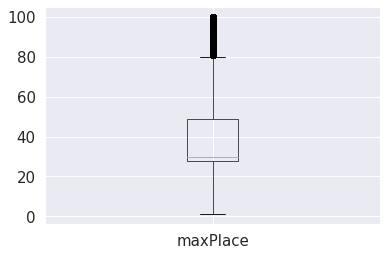

In [29]:
plt.show(num_data.boxplot('maxPlace'))

In [30]:
num_data["maxPlace"] = np.where(num_data["maxPlace"] >80.0, 80.0,num_data['maxPlace'])
t=skew(num_data["maxPlace"])
print("\033[1m Skewness of max Place : {}".format(t))

 Skewness of max Place : 1.0646769338272737


In [31]:
print(f"\033[1m 10% quantile of walk Distance : {num_data['walkDistance'].quantile(0.10)}")
print(f"\033[1m 90% quantile of walk Distance : {num_data['walkDistance'].quantile(0.90)}")

 10% quantile of walk Distance : 41.56
 90% quantile of walk Distance : 2920.0


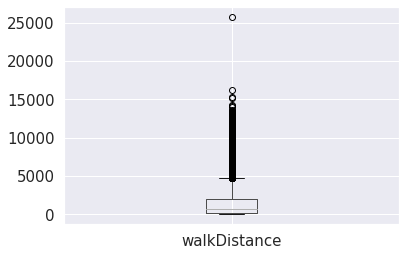

In [32]:
plt.show(num_data.boxplot('walkDistance'))

In [33]:
num_data["walkDistance"] = np.where(num_data["walkDistance"] >4000, 4000,num_data['walkDistance'])
t=skew(num_data["walkDistance"])
print("\033[1m Skewness of walk Distance : {}".format(t))

 Skewness of walk Distance : 0.8572100176420954


In [34]:
print(f"\033[1m 10% quantile of num Groups : {num_data['numGroups'].quantile(0.10)}")
print(f"\033[1m 10% quantile of num Groups : {num_data['numGroups'].quantile(0.90)}")

 10% quantile of num Groups : 26.0
 10% quantile of num Groups : 92.0


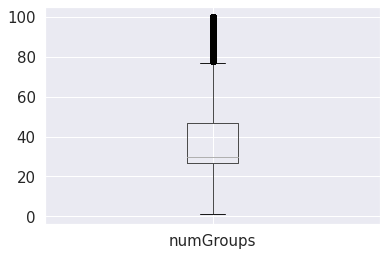

In [35]:
plt.show(num_data.boxplot('numGroups'))

In [36]:
num_data["numGroups"] = np.where(num_data["numGroups"] >76, 76,num_data['numGroups'])
t=skew(num_data["numGroups"])
print("\033[1m Skewness of num Groups : {}".format(t))

 Skewness of num Groups : 1.0187245590234653


In [37]:
print(f"\033[1m 10% quantile of boosts : {num_data['boosts'].quantile(0.10)}")
print(f"\033[1m 90% quantile of boosts : {num_data['boosts'].quantile(0.90)}")

 10% quantile of boosts : 0.0
 90% quantile of boosts : 4.0


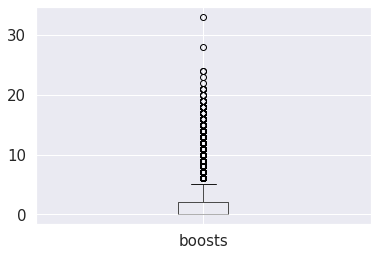

In [38]:
plt.show(num_data.boxplot('boosts'))

In [39]:
num_data["boosts"] = np.where(num_data["boosts"] >5.0, 5.0,num_data['boosts'])
t=skew(num_data["boosts"])
print("\033[1m Skewness of boosts : {}".format(t))

 Skewness of boosts : 1.3736046544404035


In [40]:
print(f"\033[1m 10% quantile of weapons Acquired : {num_data['weaponsAcquired'].quantile(0.10)}")
print(f"\033[1m 10% quantile of weapons Acquired : {num_data['weaponsAcquired'].quantile(0.90)}")

 10% quantile of weapons Acquired : -1.1946284406765848
 10% quantile of weapons Acquired : 1.3494976421228684


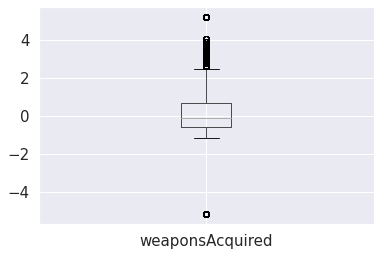

In [41]:
plt.show(num_data.boxplot('weaponsAcquired'))

In [42]:
num_data["weaponsAcquired"] = np.where(num_data["weaponsAcquired"] >2.1,2.1,num_data['weaponsAcquired'])
num_data["weaponsAcquired"] = np.where(num_data["weaponsAcquired"] <-1.1997660052684802,-1.1997660052684802,num_data['weaponsAcquired'])
t=skew(num_data["weaponsAcquired"])
print("\033[1m Skewness of Years With Curr Manager : {}".format(t))

 Skewness of Years With Curr Manager : 0.3130462022298758


In [43]:
print(f"\033[1m 10% quantile of kill Streaks : {num_data['killStreaks'].quantile(0.10)}")
print(f"\033[1m 10% quantile of kill Streaks : {num_data['killStreaks'].quantile(0.90)}")

 10% quantile of kill Streaks : 0.0
 10% quantile of kill Streaks : 1.0


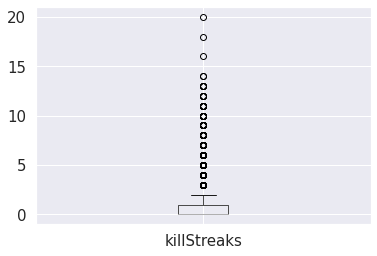

In [44]:
plt.show(num_data.boxplot('killStreaks'))

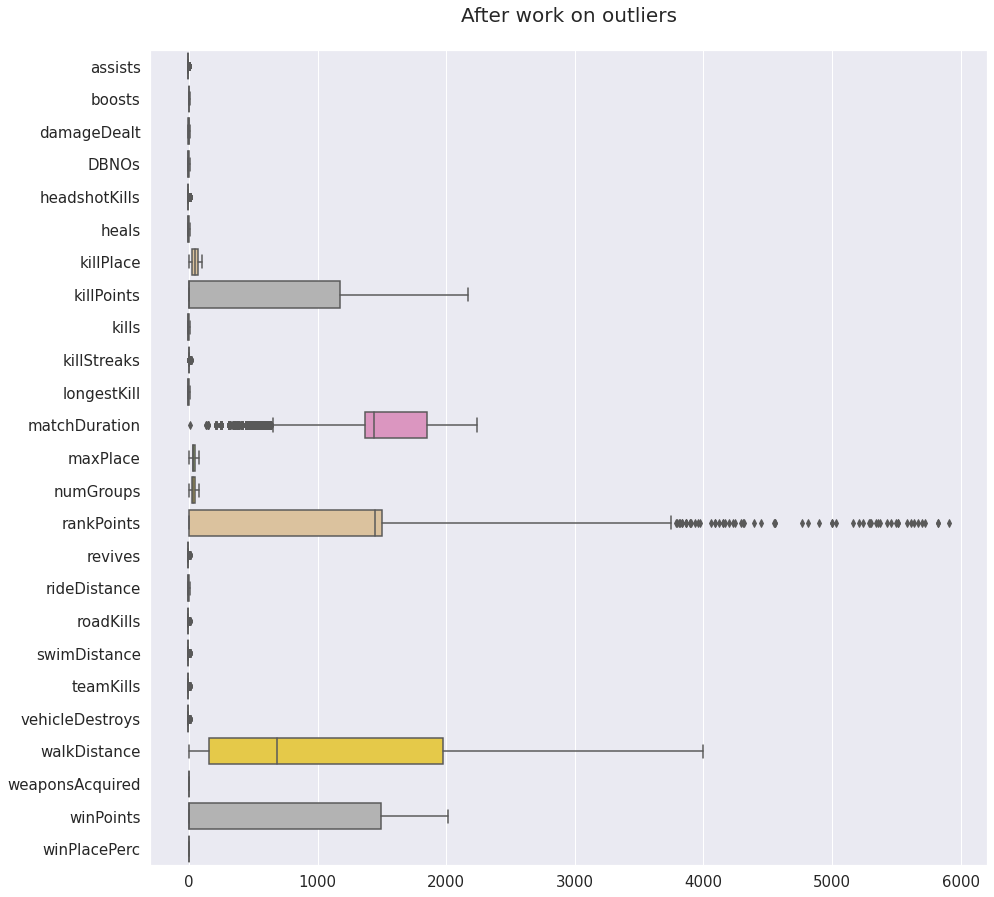

In [45]:
plt.figure(figsize=(15,15))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("After work on outliers\n",fontsize=20)
plt.show()

# Label Encoder for object data type

In [46]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['matchType']] = final_df[['matchType']].apply(label.fit_transform)
final_df

,matchType,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,15,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,60,1241,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,244.80,-1.194628,1466,0.4444
1,15,-5.199338,0,0.048093,-5.199338,-5.199338,-5.199338,57,0,-5.199338,...,-5.199338,0.656264,-5.199338,1.641205,-5.199338,-5.199338,1434.00,0.648724,0,0.6400
2,2,1.233962,0,-0.117532,-5.199338,-5.199338,-5.199338,47,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,161.80,-0.619578,0,0.7755
3,15,-5.199338,0,-0.373263,-5.199338,-5.199338,-5.199338,75,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,202.70,-0.148584,0,0.1667
4,13,-5.199338,0,0.179102,-5.199338,-5.199338,-5.199338,45,0,0.443149,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,49.75,-0.619578,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,15,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,74,1029,-5.199338,...,-5.199338,1.016532,-5.199338,-5.199338,-5.199338,-5.199338,1019.00,-0.148584,1507,0.1786
4446962,12,-5.199338,1,-0.293748,-5.199338,-5.199338,-5.199338,69,0,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,81.70,1.010382,0,0.2935
4446963,15,-5.199338,0,-0.179771,-5.199338,-5.199338,-5.199338,66,0,-5.199338,...,-5.199338,-5.199338,-5.199338,1.539450,-5.199338,-5.199338,788.70,0.265284,0,0.4815
4446964,15,-5.199338,4,0.649964,0.630254,1.258508,0.774833,11,0,0.951518,...,2.156675,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,2748.00,1.669112,0,0.8000


# Defining feature & target variable

In [47]:
X = final_df.iloc[:,:-1] #features
y = final_df.iloc[:,-1] # target variable
X

,matchType,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,15,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,60,1241,-5.199338,...,-1,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,244.80,-1.194628,1466
1,15,-5.199338,0,0.048093,-5.199338,-5.199338,-5.199338,57,0,-5.199338,...,1484,-5.199338,0.656264,-5.199338,1.641205,-5.199338,-5.199338,1434.00,0.648724,0
2,2,1.233962,0,-0.117532,-5.199338,-5.199338,-5.199338,47,0,-5.199338,...,1491,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,161.80,-0.619578,0
3,15,-5.199338,0,-0.373263,-5.199338,-5.199338,-5.199338,75,0,-5.199338,...,1408,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,202.70,-0.148584,0
4,13,-5.199338,0,0.179102,-5.199338,-5.199338,-5.199338,45,0,0.443149,...,1560,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,49.75,-0.619578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,15,-5.199338,0,-5.199338,-5.199338,-5.199338,-5.199338,74,1029,-5.199338,...,-1,-5.199338,1.016532,-5.199338,-5.199338,-5.199338,-5.199338,1019.00,-0.148584,1507
4446962,12,-5.199338,1,-0.293748,-5.199338,-5.199338,-5.199338,69,0,-5.199338,...,1501,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,81.70,1.010382,0
4446963,15,-5.199338,0,-0.179771,-5.199338,-5.199338,-5.199338,66,0,-5.199338,...,1500,-5.199338,-5.199338,-5.199338,1.539450,-5.199338,-5.199338,788.70,0.265284,0
4446964,15,-5.199338,4,0.649964,0.630254,1.258508,0.774833,11,0,0.951518,...,1418,2.156675,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,2748.00,1.669112,0


# Feature Selection method

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
k = fs.fit(X, y)

In [49]:
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

t=featurescores.nlargest(15,'Scores')
t

,feature_names,Scores
13,maxPlace,3426.649773
22,walkDistance,3418.976645
14,numGroups,3368.127815
0,matchType,2694.490735
7,killPlace,1700.602262
2,boosts,1275.016885
23,weaponsAcquired,1037.750309
6,heals,721.014311
17,rideDistance,384.240094
11,longestKill,332.702370


In [50]:
features=[]
for i in t.feature_names:
    features.append(i)
print(features)

['maxPlace', 'walkDistance', 'numGroups', 'matchType', 'killPlace', 'boosts', 'weaponsAcquired', 'heals', 'rideDistance', 'longestKill', 'kills', 'damageDealt', 'killStreaks', 'DBNOs', 'assists']


# Select top 15 features for model trainning

In [51]:
X = X[features]
X

,maxPlace,walkDistance,numGroups,matchType,killPlace,boosts,weaponsAcquired,heals,rideDistance,longestKill,kills,damageDealt,killStreaks,DBNOs,assists
0,28,244.80,26,15,60,0,-1.194628,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0,-5.199338,-5.199338
1,26,1434.00,25,15,57,0,0.648724,-5.199338,0.656264,-5.199338,-5.199338,0.048093,0,-5.199338,-5.199338
2,50,161.80,47,2,47,0,-0.619578,-5.199338,-5.199338,-5.199338,-5.199338,-0.117532,0,-5.199338,1.233962
3,31,202.70,30,15,75,0,-0.148584,-5.199338,-5.199338,-5.199338,-5.199338,-0.373263,0,-5.199338,-5.199338
4,97,49.75,95,13,45,0,-0.619578,-5.199338,-5.199338,1.135137,0.443149,0.179102,1,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,29,1019.00,28,15,74,0,-0.148584,-5.199338,1.016532,-5.199338,-5.199338,-5.199338,0,-5.199338,-5.199338
4446962,93,81.70,93,12,69,1,1.010382,-5.199338,-5.199338,-5.199338,-5.199338,-0.293748,0,-5.199338,-5.199338
4446963,28,788.70,28,15,66,0,0.265284,-5.199338,-5.199338,-5.199338,-5.199338,-0.179771,0,-5.199338,-5.199338
4446964,26,2748.00,25,15,11,4,1.669112,0.774833,-5.199338,1.461674,0.951518,0.649964,1,0.630254,-5.199338


# Downcast the data type

In [52]:
X = X.astype(float)
y = y.astype(float)

# Splitting the data type

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

# Machine Learning Algorithm

## XGBRegressor

In [54]:
from xgboost import XGBRegressor
# Initilize model
model_xgb = XGBRegressor() # random forest with default parameters
model_xgb.fit(X_train,y_train)
y_predict = model_xgb.predict(X_test)

## Model Evaluation

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y_test,y_predict))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y_test,y_predict))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y_test,y_predict))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y_test,y_predict)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 0.061879794088700875
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 0.007496397910212762
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.9206331668038473
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 0.24875649557087123
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


In [56]:
import statsmodels.api as sm
model1 = sm.OLS(y_test,X_test).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.058e+06
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        04:30:25   Log-Likelihood:                      5.7756e+05
No. Observations:             1334090   AIC:                                 -1.155e+06
Df Residuals:                 1334075   BIC:                                 -1.155e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
maxPlace           -0.0023   8.81e-05    -26.158      0.000      -0.002      -0.002
walkDistance        0.0001   1.68e-07    891.015      0.000       0.000       0.000
numGroups           0.0050   9.03e-05     55.779      0.000       0.005       0.005
matchType           0.0050   2.47e-05    203.805      0.000       0.005       0.005
killPlace          -0.0048   1.19e-05   -404.377      0.000      -0.005      -0.005
boosts              0.0288      0.000    250.687      0.000       0.029       0.029
weaponsAcquired     0.0231      0.000    195.096      0.000       0.023       0.023
heals              -0.0008   5.99e-05    -12.605      0.000      -0.001      -0.001
rideDistance       -0.0059   5.45e-05   -109.017      0.000      -0.006      -0.006
longestKill         0.0501      0.000    159.565      0.000       0.049       0.051
kills              -0.1174      0.000   -314.727      0.000      -0.118      -0.117
damageDealt         0.0045   7.38e-05     61.104      0.000       0.004       0.005
killStreaks         0.1841      0.000    474.106      0.000       0.183       0.185
DBNOs              -0.0047   6.79e-05    -69.260      0.000      -0.005      -0.005
assists            -0.0036   5.74e-05    -62.269      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    83193.183   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320843.450
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Light gradient boosting

In [57]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(n_estimators=2000)
model_lgb.fit(X_train, y_train)
pred2 = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration_)

## Model Evaluation

In [58]:
print('\033[1m\nMean Absolute Error:',mean_absolute_error(y_test,pred2))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y_test,pred2))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y_test,pred2))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y_test,pred2)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 0.06042547504422132
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 0.007192580566663654
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.9238497810653061
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 0.24581593732754864
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


In [59]:
import statsmodels.api as sm
model1 = sm.OLS(y_test,X_test).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.058e+06
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        04:34:15   Log-Likelihood:                      5.7756e+05
No. Observations:             1334090   AIC:                                 -1.155e+06
Df Residuals:                 1334075   BIC:                                 -1.155e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
maxPlace           -0.0023   8.81e-05    -26.158      0.000      -0.002      -0.002
walkDistance        0.0001   1.68e-07    891.015      0.000       0.000       0.000
numGroups           0.0050   9.03e-05     55.779      0.000       0.005       0.005
matchType           0.0050   2.47e-05    203.805      0.000       0.005       0.005
killPlace          -0.0048   1.19e-05   -404.377      0.000      -0.005      -0.005
boosts              0.0288      0.000    250.687      0.000       0.029       0.029
weaponsAcquired     0.0231      0.000    195.096      0.000       0.023       0.023
heals              -0.0008   5.99e-05    -12.605      0.000      -0.001      -0.001
rideDistance       -0.0059   5.45e-05   -109.017      0.000      -0.006      -0.006
longestKill         0.0501      0.000    159.565      0.000       0.049       0.051
kills              -0.1174      0.000   -314.727      0.000      -0.118      -0.117
damageDealt         0.0045   7.38e-05     61.104      0.000       0.004       0.005
killStreaks         0.1841      0.000    474.106      0.000       0.183       0.185
DBNOs              -0.0047   6.79e-05    -69.260      0.000      -0.005      -0.005
assists            -0.0036   5.74e-05    -62.269      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    83193.183   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320843.450
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## CatBoostRegressor

In [61]:
from catboost import CatBoostRegressor

model_cbr = CatBoostRegressor(iterations=2000,learning_rate=0.03,custom_metric=['RMSE'])
model_cbr.fit( X_train, y_train, use_best_model=True, eval_set=(X_test, y_test),verbose=False)

In [62]:
print(model_cbr.get_best_score())

{'learn': {'RMSE': 0.08545973196284094}, 'validation': {'RMSE': 0.08580217014536029}}


In [63]:
y_predict = model_cbr.predict(X_test)

## Model Evaluation

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y_test,y_predict))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y_test,y_predict))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y_test,y_predict))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y_test,y_predict)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 0.06133748216987245
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 0.007362012450438307
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.9220559499188388
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 0.24766405102451275
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


In [65]:
import statsmodels.api as sm
model1 = sm.OLS(y_test,X_test).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.058e+06
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        04:53:05   Log-Likelihood:                      5.7756e+05
No. Observations:             1334090   AIC:                                 -1.155e+06
Df Residuals:                 1334075   BIC:                                 -1.155e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
maxPlace           -0.0023   8.81e-05    -26.158      0.000      -0.002      -0.002
walkDistance        0.0001   1.68e-07    891.015      0.000       0.000       0.000
numGroups           0.0050   9.03e-05     55.779      0.000       0.005       0.005
matchType           0.0050   2.47e-05    203.805      0.000       0.005       0.005
killPlace          -0.0048   1.19e-05   -404.377      0.000      -0.005      -0.005
boosts              0.0288      0.000    250.687      0.000       0.029       0.029
weaponsAcquired     0.0231      0.000    195.096      0.000       0.023       0.023
heals              -0.0008   5.99e-05    -12.605      0.000      -0.001      -0.001
rideDistance       -0.0059   5.45e-05   -109.017      0.000      -0.006      -0.006
longestKill         0.0501      0.000    159.565      0.000       0.049       0.051
kills              -0.1174      0.000   -314.727      0.000      -0.118      -0.117
damageDealt         0.0045   7.38e-05     61.104      0.000       0.004       0.005
killStreaks         0.1841      0.000    474.106      0.000       0.183       0.185
DBNOs              -0.0047   6.79e-05    -69.260      0.000      -0.005      -0.005
assists            -0.0036   5.74e-05    -62.269      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    83193.183   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320843.450
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""